# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

import datetime

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
# Range of latitudes and longitudes
lat_range = (-80, 80)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in full_cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 665


# reduced number of cities for code development
# test code
count = 0
for city in full_cities:
    if count <35:
        cities.append(city)
        count +=1

print(f"Number of cities in the smaller list: {len(cities)}")


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

# test code

url = "https://api.openweathermap.org/data/2.5/weather?"
city = cities[27]

city_url = url + "q=" + city + "&appid=" + weather_api_key

print(city_url)

city_weather = requests.get(city_url).json()

city_weather

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        dt = city_weather['dt']
        dt2 = datetime.datetime.fromtimestamp(dt)
        city_date = dt2.strftime("%Y-%m-%d")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | norcasia
Processing Record 2 of Set 1 | kingston
Processing Record 3 of Set 1 | saacow
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | santo antonio do ica
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | biltine
Processing Record 13 of Set 1 | la passe
Processing Record 14 of Set 1 | mo i rana
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | luganville
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | bethanie
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1

In [9]:
print(city_data)

[{'City': 'norcasia', 'Lat': 5.5778, 'Lng': -74.8852, 'Max Temp': 24.379999999999995, 'Humidity': 88, 'Cloudiness': 100, 'Wind Speed': 1.3, 'Country': 'CO', 'Date': '2024-02-03'}, {'City': 'kingston', 'Lat': 17.997, 'Lng': -76.7936, 'Max Temp': 28.620000000000005, 'Humidity': 62, 'Cloudiness': 19, 'Wind Speed': 2.24, 'Country': 'JM', 'Date': '2024-02-03'}, {'City': 'saacow', 'Lat': 1.6279, 'Lng': 42.4407, 'Max Temp': 35.79000000000002, 'Humidity': 30, 'Cloudiness': 83, 'Wind Speed': 6.29, 'Country': 'SO', 'Date': '2024-02-03'}, {'City': 'port-aux-francais', 'Lat': -49.35, 'Lng': 70.2167, 'Max Temp': 7.7099999999999795, 'Humidity': 78, 'Cloudiness': 40, 'Wind Speed': 1.86, 'Country': 'TF', 'Date': '2024-02-03'}, {'City': 'waitangi', 'Lat': -43.9535, 'Lng': -176.5597, 'Max Temp': 13.939999999999998, 'Humidity': 75, 'Cloudiness': 25, 'Wind Speed': 10.99, 'Country': 'NZ', 'Date': '2024-02-03'}, {'City': 'stanley', 'Lat': 54.868, 'Lng': -1.6985, 'Max Temp': 8.879999999999995, 'Humidity': 76

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          35
Lat           35
Lng           35
Max Temp      35
Humidity      35
Cloudiness    35
Wind Speed    35
Country       35
Date          35
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,norcasia,5.5778,-74.8852,24.38,88,100,1.30,CO,2024-02-03
1,kingston,17.9970,-76.7936,28.62,62,19,2.24,JM,2024-02-03
2,saacow,1.6279,42.4407,35.79,30,83,6.29,SO,2024-02-03
3,port-aux-francais,-49.3500,70.2167,7.71,78,40,1.86,TF,2024-02-03
4,waitangi,-43.9535,-176.5597,13.94,75,25,10.99,NZ,2024-02-03


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [4]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-41.88,31,20,2.06,US,2024-02-01
1,adamstown,-25.0660,-130.1015,25.03,87,10,9.99,PN,2024-02-01
2,avarua,-21.2078,-159.7750,28.18,78,97,3.09,CK,2024-02-01
3,grytviken,-54.2811,-36.5092,5.97,69,42,4.56,GS,2024-02-01
4,qaqortoq,60.7167,-46.0333,-12.71,90,72,1.87,GL,2024-02-01


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [5]:
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date           object
dtype: object

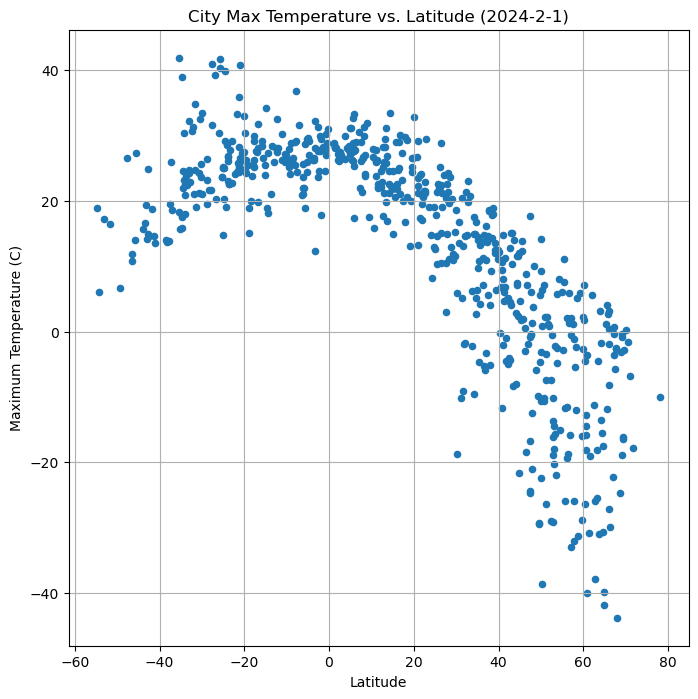

<Figure size 640x480 with 0 Axes>

In [6]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),
              title="City Max Temperature vs. Latitude (2024-2-1)",xlabel = "Latitude", ylabel = "Maximum Temperature (C)")
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")


#### Latitude Vs. Humidity

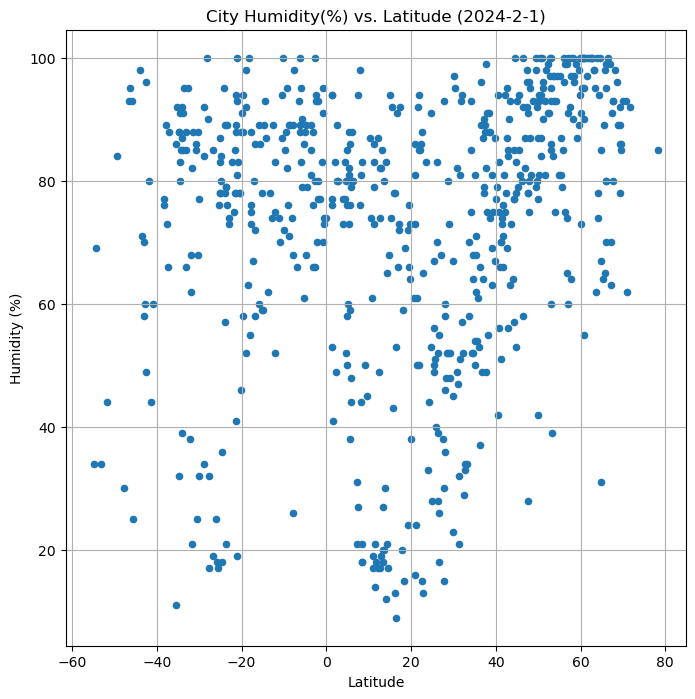

<Figure size 640x480 with 0 Axes>

In [7]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),
              title="City Humidity(%) vs. Latitude (2024-2-1)",xlabel = "Latitude", ylabel = "Humidity (%)")
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")


#### Latitude Vs. Cloudiness

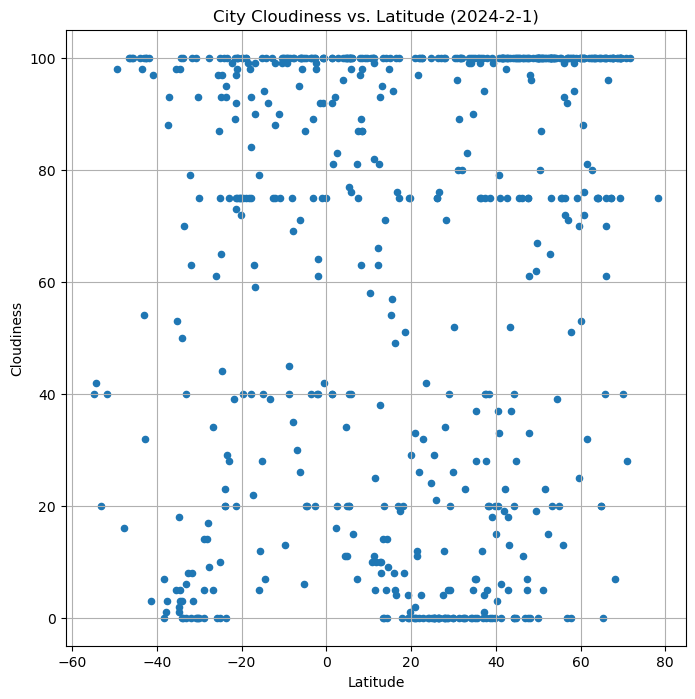

<Figure size 640x480 with 0 Axes>

In [8]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="City Cloudiness vs. Latitude (2024-2-1)",xlabel = "Latitude", ylabel = "Cloudiness")
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

#### Latitude vs. Wind Speed Plot

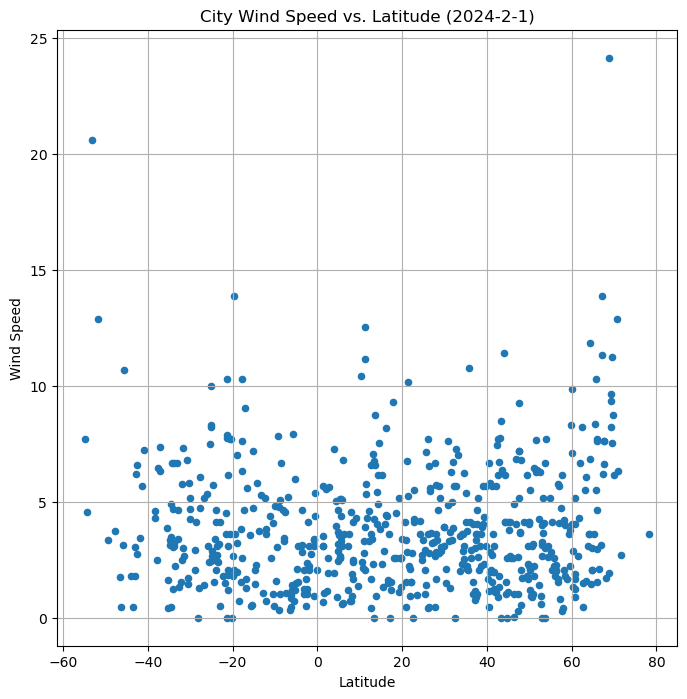

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),
              title="City Wind Speed vs. Latitude (2024-2-1)",xlabel = "Latitude", ylabel = "Wind Speed")
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")


---

## Requirement 2: Compute Linear Regression for Each Relationship


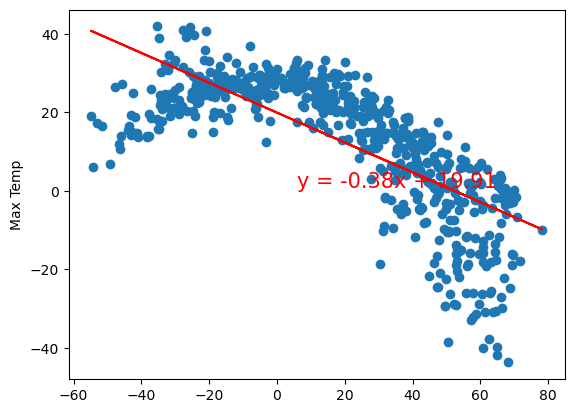

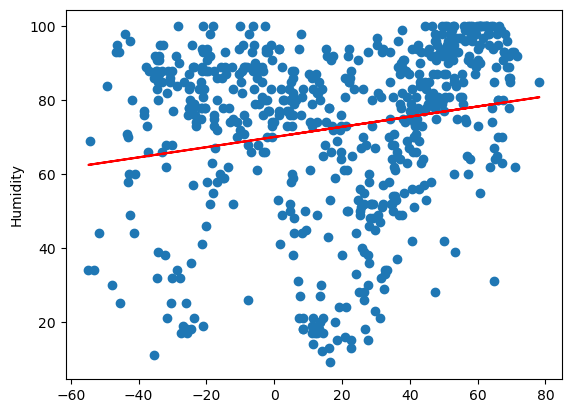

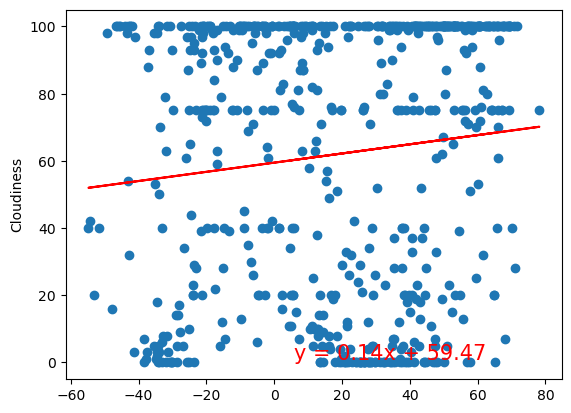

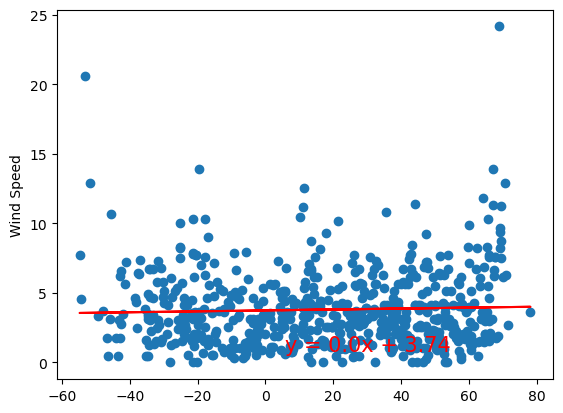

In [10]:
# Define a function to create Linear Regression plots
y_axis_columns = ['Max Temp',"Humidity","Cloudiness","Wind Speed"]

x_values = city_data_df['Lat']

def lin_regress():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.xlabel = ("Latitude")
    plt.ylabel(y_axis_columns[y])
    plt.show()
for y in range(4):
     y_values = city_data_df[y_axis_columns[y]]
     lin_regress()



In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0,:]


# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-41.88,31,20,2.06,US,2024-02-01
4,qaqortoq,60.7167,-46.0333,-12.71,90,72,1.87,GL,2024-02-01
5,tura,25.5198,90.2201,14.65,67,0,1.43,IN,2024-02-01
7,whitehorse,60.7161,-135.0538,-14.42,55,100,5.14,CA,2024-02-01
8,bilibino,68.0546,166.4372,-43.76,98,7,1.73,RU,2024-02-01
...,...,...,...,...,...,...,...,...,...
618,am timan,11.0297,20.2827,27.69,17,100,2.77,TD,2024-02-01
619,shalqar,47.8333,59.6000,-12.53,96,61,3.68,KZ,2024-02-01
620,nejo,9.5000,35.5000,17.51,45,100,1.36,ET,2024-02-01


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,25.03,87,10,9.99,PN,2024-02-01
2,avarua,-21.2078,-159.7750,28.18,78,97,3.09,CK,2024-02-01
3,grytviken,-54.2811,-36.5092,5.97,69,42,4.56,GS,2024-02-01
6,hell-ville,-13.4000,48.2667,28.41,78,39,5.28,MG,2024-02-01
10,blackmans bay,-43.0167,147.3167,14.22,58,54,1.79,AU,2024-02-01


###  Temperature vs. Latitude Linear Regression Plot

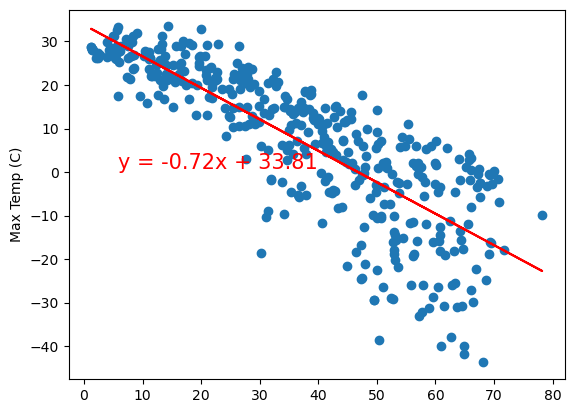

The r-value is : -0.8209501433954304


In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()
print("The r-value is :", rvalue)


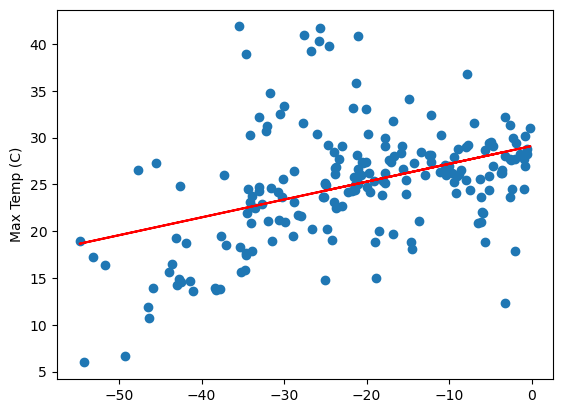

The r-value is : 0.4092654754804857


In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.show()
print("The r-value is :", rvalue)

**Discussion about the linear relationship:** 

In the Northern Hemisphere, there is clearly some correlation between Latitude and Maximum Temperature for this date in February.  There is increased variability north of Latitude 30, however.  North of this latitude, the range of maximum temperatures for a given latitude increases dramatically.  It might be interesting to simply look at a regression for the tropical locations in the Northern Hemisphere.  I believe the r-value would be even closer to 1.

For the Southern Hemisphere, the correlation is much less.  There are many cities in latitudes between -20 and -30 that show quite high temperatures.  This is perhaps unsurprising as the temperatures reflect summertime weather in these areas, somewhat distant from the equator where seasonal temperature differences would be expected.  Similarly, the temperatures in the southern hemisphere, even far from the equator show higher maximum temperatures than some places in the northern hemisphere.  It should also be noted that there are no cities randomly chosen that are further south than -60 latitude.  There are also quite a few fewer cities represented in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

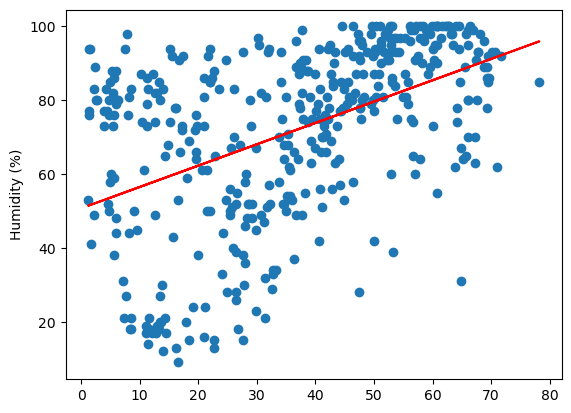

The r-value is : 0.47653491529027353


In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
print("The r-value is :", rvalue)

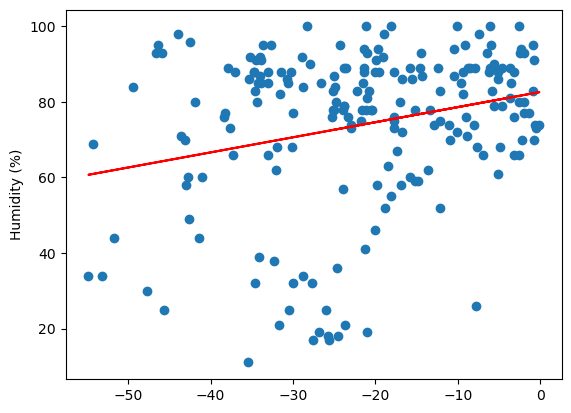

The r-value is : 0.2530308880910745


In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
print("The r-value is :", rvalue)

**Discussion about the linear relationship:** 
There is very little correlation between humidity and latitude for either the northern hemisphere of the southern hemisphere.  It appears that there is a very broad trend toward higher humidity nearer the equator, and lower humidity farther from the equator, but it is not useful for making predictions for any individual city.  The variability in humidity, especially at the higher latitudes, is quite high.  
One could say that there is a very good chance that the humidity will be above 60% for any city within 20 degrees of the equator, but there are many examples of cities for which this is still not true.   

### Cloudiness vs. Latitude Linear Regression Plot

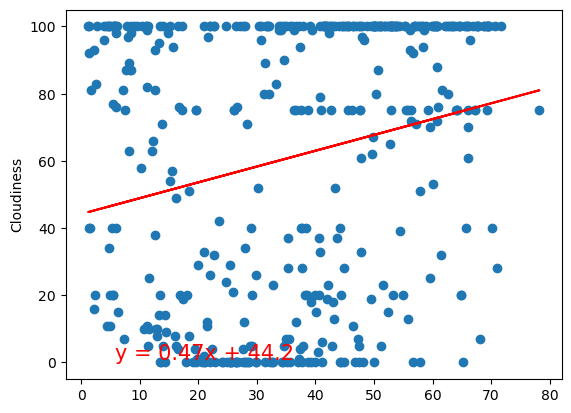

The r-value is : 0.22788839903460528


In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print("The r-value is :", rvalue)

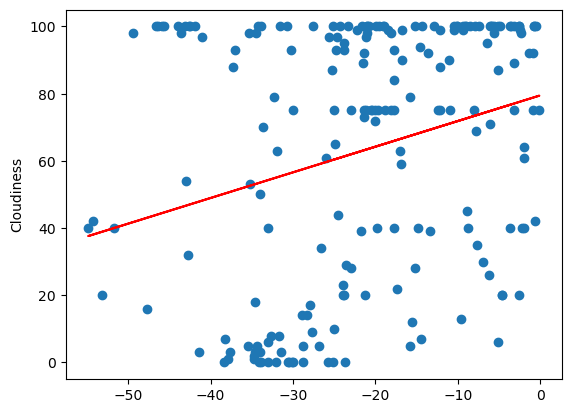

The r-value is : 0.26966598990669305


In [31]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print("The r-value is :", rvalue)

**Discussion about the linear relationship:** 

There is essentially no relationship between latitude and cloudiness.  The r-values for both hemispheres are both well below 0.3.  There is a large amount of variability of cloudiness at the same latitude.  Cloudiness apparently depends much more heavily on factors other than latitude.

### Wind Speed vs. Latitude Linear Regression Plot

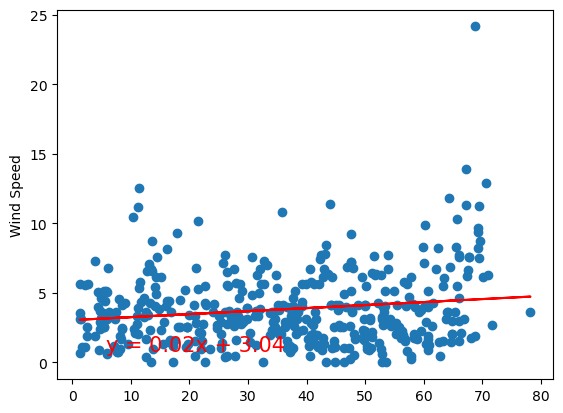

The r-value is : 0.15757699629675473


In [34]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print("The r-value is :", rvalue)

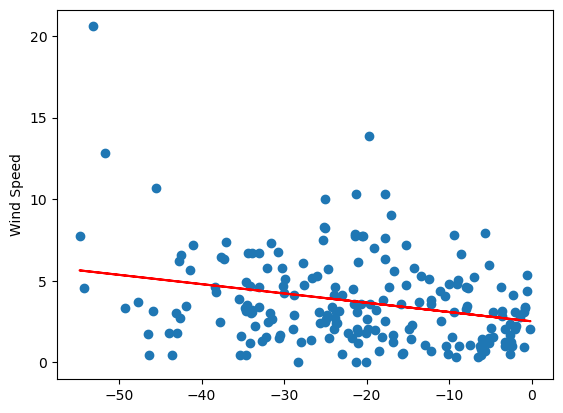

The r-value is : -0.27215453226081404


In [33]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print("The r-value is :", rvalue)

**Discussion about the linear relationship:** 

There appears to be no real relationship between latitude and wind speed.  The wind speed varies greatly between 0 and 10 for all latitudes.  Wind speeds between 10 and 15 are present for nearly all latitudes, but are less prevalent close to the equator.  The largest wind speeds were for cities far from the equator.  Only one city in the northern hemisphere and one in the southern hemisphere had wind speed above 20.  Both of these cities are beyond 50 degrees North or South of the equator.